# Анализ крупного интернет-магазина. Проверка гипотез для увеличения выручки.

Исследование с точки зрения аналитика крупного интернет-магазина.   
Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.  
Наша задача — приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

<b>Часть 1. Приоритизация гипотез </b>  
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  
<b>Задача:</b>
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


<b>Часть 2. Анализ A/B-теста</b>  
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.  
<b>Задача:</b>  
Проанализировать A/B-тест:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объяснить его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

### Загрузим данные и подготовим их к анализу

In [37]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [38]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [39]:
#переименуем столбцы на змеиным регистром
hypothesis.columns = hypothesis.columns.str.lower()
orders= orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id'})

## Часть 1. Приоритизация гипотез.

In [40]:
# рассмотрим данные
display(hypothesis) 

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [41]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6

In [42]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


По RICE восьмая гипотеза спустилась на пятое место из-за минимального охвата, а место в четверке заняла вторая гипотеза. На же первом месте оказалась 7 гипотеза, так как ее охват получил максимальную оценку.

## Часть 2. Анализ A/B-теста

###### Предобработка

In [43]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [44]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков в данных нет. У дат неправильный тип

In [45]:
#исправим тип даты
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [46]:
# проверяем наличие полных дубликатов
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


Дубликатов не обнаружено.

###### Рассмотрим данные повнимательнее

In [47]:
orders['group'].unique() #проверим сколько групп

array(['B', 'A'], dtype=object)

In [48]:
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [49]:
gr_a = orders[orders['group'] == 'A']['visitor_id']
gr_b = orders[orders['group'] == 'B']['visitor_id']
orders_ab = orders.query('visitor_id in @gr_a and visitor_id in @gr_b')
print('Посетителей в группе А:', gr_a.nunique())
print('Посетителей в группе B:', gr_b.nunique())
print('Количество посетителей попавших в обе группы:', orders_ab['visitor_id'].nunique())
print('Всего посетителей в тесте:', orders['visitor_id'].nunique())

Посетителей в группе А: 503
Посетителей в группе B: 586
Количество посетителей попавших в обе группы: 58
Всего посетителей в тесте: 1031


Часть пользователей у нас попала в обе группы. Это около 5%, что может быть не критично, но и удалить мы их не можем, так как в датасете visitors у нас нет visitor_id и вычленить их из общего числа группы не получится. Постараемся учесть эту проблему в дальнейшем.

Так же существует проблема того, что в группе А на 16% больше посетителей, это может сильно отразиться на результатах теста

### График кумулятивной выручки по группам.

In [50]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],orders['group'] == x['group'])]
                                     .agg({'date' : 'max',
                                           'group' : 'max',
                                           'transaction_id' : 'nunique',
                                           'visitor_id' : 'nunique',
                                           'revenue' : 'sum'}),
                                     axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


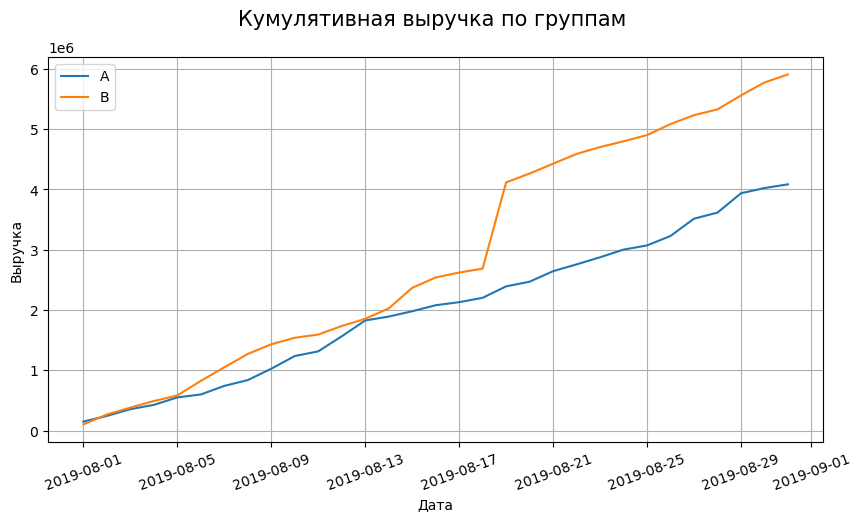

In [51]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам \n', fontsize = 15)
plt.legend()
plt.xticks(rotation=20);

Выручка группы А почти равномерно увеличивается в течение всего теста. 
Однако график выручки группы В в середине резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам

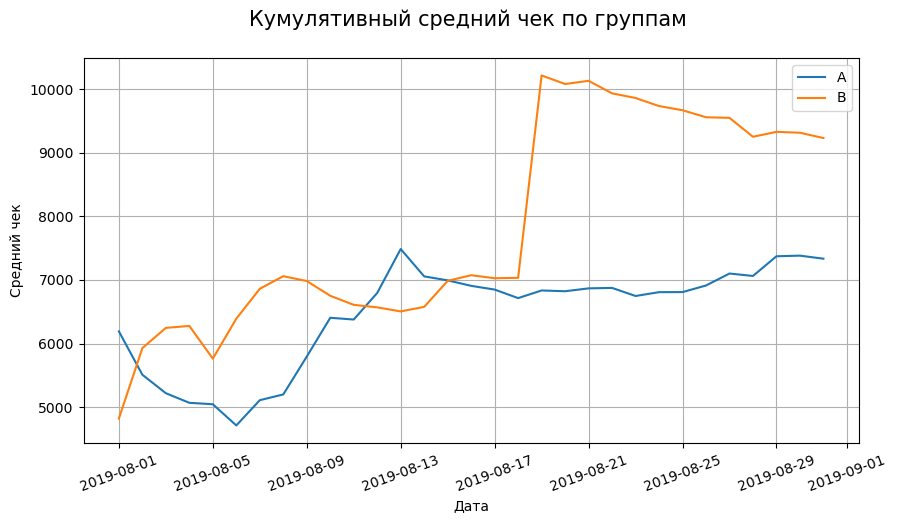

In [52]:
plt.figure(figsize=(10,5)) 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по группам \n', fontsize = 15)
plt.legend()
plt.xticks(rotation=20);

Судя по резкому увеличению среднего чека группы В именно он повлиял на скачок кумулятивной выручки. По среднему чеку группы А видно, что он становится более равномерным ближе к концу теста.

### График относительного изменения кумулятивного среднего чека группы B к группе A

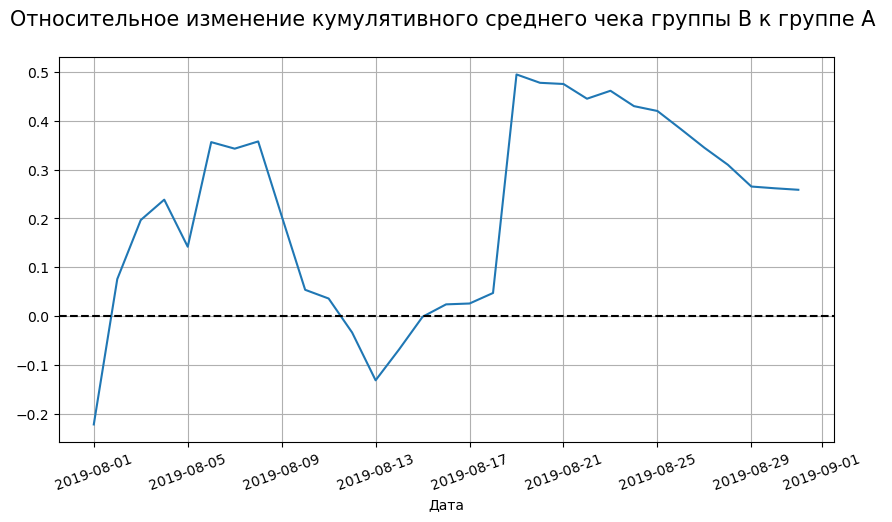

In [53]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

plt.figure(figsize=(10,5)) 

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid(True)
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A \n', fontsize = 15)
plt.xticks(rotation=20);

График в нескольких местах резко скачет, что может означать наличие выбросов

### График кумулятивного среднего количества заказов на посетителя по группам

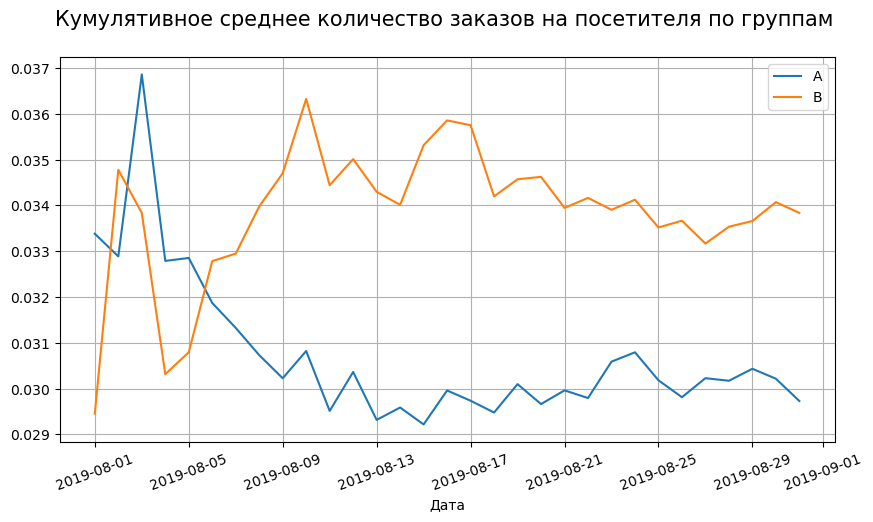

In [54]:
# считаем кумулятивное среднего количества заказов 
cumulativeData['cum_avg'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,5)) 
plt.plot(cumulativeDataA['date'], cumulativeDataA['cum_avg'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['cum_avg'], label='B')
plt.legend()
plt.grid(True)
plt.xlabel('Дата')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам \n', fontsize = 15)
plt.xticks(rotation=20);

Группы колебались в противоположные стороны, но затем среднее количество заказов на посетителя группы В вырвалось вперёд и зафиксировалась, а среднее количество заказов на посетителя группы А просело и также зафиксировалось.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

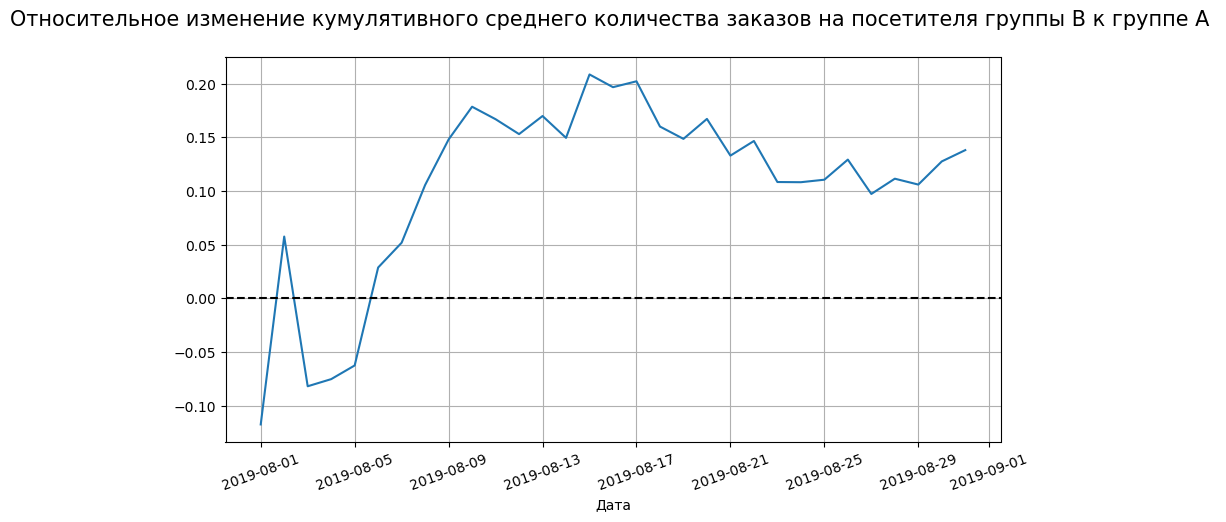

In [55]:
mergedCumulativeAvg = cumulativeDataA[['date','cum_avg']].merge(
    cumulativeDataB[['date','cum_avg']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeAvg['date'], mergedCumulativeAvg['cum_avgB']/mergedCumulativeAvg['cum_avgA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A \n', 
          fontsize = 15)
plt.xticks(rotation=20);

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом опять отстала и опять вырвалась и больше так сильно не отставала.
В целом относительное изменение кумулятивного среднего количества заказов ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Точечный график количества заказов по пользователям

In [56]:
# Подсчитаем количество заказов по посетителям и посмотрим на результат:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


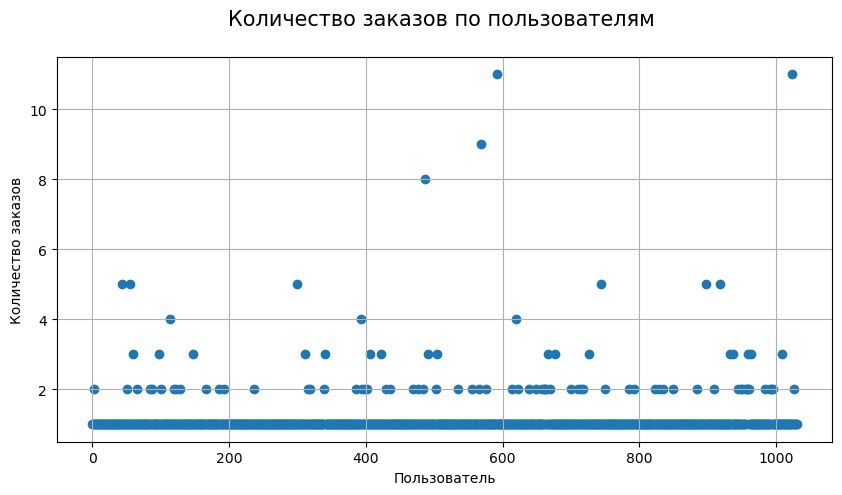

In [57]:
x_values = pd.Series(range(0,len(ordersByUsers)))


plt.figure(figsize=(10,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid(True)
plt.ylabel('Количество заказов')
plt.xlabel('Пользователь')
plt.title('Количество заказов по пользователям \n', fontsize = 15);

Много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### 95-й и 99-й перцентили количества заказов на пользователя

In [58]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% посетителей оформляли больше чем 2 заказа. И 1% посетителей заказывали более 4 раз.   
Разумно выбрать 3 или 4 заказов на одного посетителя за верхнюю границу числа заказов, и отсеять аномальных посетителей по ней. 

### Точечный график стоимостей заказов

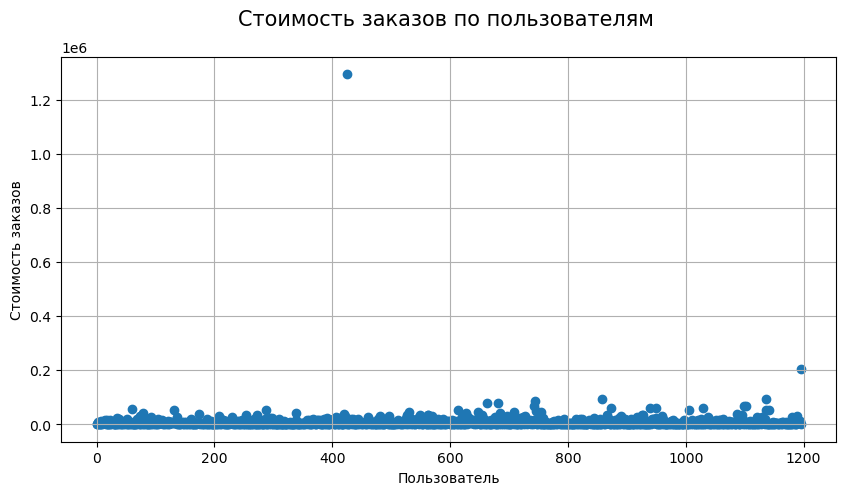

In [59]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'])
plt.grid(True)
plt.ylabel('Стоимость заказов')
plt.xlabel('Пользователь')
plt.title('Стоимость заказов по пользователям \n', fontsize = 15);

In [60]:
orders['revenue'].sort_values(ascending=False).head(5)

425     1294500
1196     202740
858       93940
1136      92550
744       86620
Name: revenue, dtype: int64

Присутсвуют два значения, которые мешают увидеть полную картину

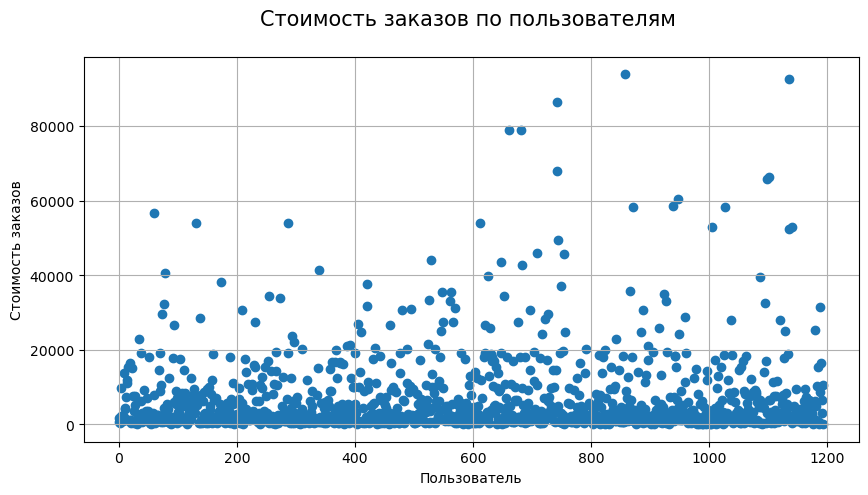

In [61]:
orderslimit = orders.query('revenue < 100000')
x_values = pd.Series(range(0,len(orderslimit['revenue'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orderslimit['revenue'])
plt.grid(True)
plt.ylabel('Стоимость заказов')
plt.xlabel('Пользователь')
plt.title('Стоимость заказов по пользователям \n', fontsize = 15);

Выглядит, что немногие заказы дороже 30 тысяч

### 95-й и 99-й перцентили стоимости заказов

In [62]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Как и показано на графике, менее 5% заказов на дороже чем 28 тысяч и не более 1% дороже 58 тысяч

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Метод, который будем применять для A/B-тестирования, называется U-критерий Манна-Уитни.  

Примем за достаточное пороговое значение уровня значимости p-value = 0.05

Сформулируем гипотезы:
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем количестве заказов между группами есть.

In [63]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [64]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [65]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [66]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')], axis=0)

In [67]:
print('p-value критерий Манна-Уитни:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный выигрыш группы B:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value критерий Манна-Уитни: 0.017
Относительный выигрыш группы B: 0.138


Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет отвергаем. Однако относительный выигрыш группы B равен 13.8% — второе число в выводе.

Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть. 

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:
- Нулевая: различий в среднем чеке между группами нет. 
- Альтернативная: различия в среднем чеке между группами есть.

In [68]:
print('p-value критерий Манна-Уитни:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный выигрыш группы B:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value критерий Манна-Уитни: 0.729
Относительный выигрыш группы B: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных посетителей тех, кто совершил от 4 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 1% посетителей с наибольшим числом заказов и около 5% посетителей с дорогими заказами. 

In [69]:
revenue_threshold = orders['revenue'].quantile(0.95)
orders_threshold = ordersByUsers['orders'].quantile(0.99)

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_threshold]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_threshold]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_threshold]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Пороговое значение выручки:',round(revenue_threshold))
print('Пороговое значение количества заказов',orders_threshold)
print('Таблица с аномальными посетителями: \n', abnormalUsers.head(5))
print('Количество аномальных посетителей:', abnormalUsers.shape[0])

Пороговое значение выручки: 28000
Пороговое значение количества заказов 4.0
Таблица с аномальными посетителями: 
 1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitor_id, dtype: int64
Количество аномальных посетителей: 59


Всего 59 аномальных посетителей. Учитывая что всего посетителей в тесте 1031, это около 5,7%

In [70]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [71]:
print('p-value критерий Манна-Уитни:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный выигрыш группы B:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value критерий Манна-Уитни: 0.018
Относительный выигрыш группы B: 0.145


Результаты по среднему количеству заказов практически не изменились. 

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [72]:
print('p-value критерий Манна-Уитни:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный проигрыш группы B:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value критерий Манна-Уитни: 0.961
Относительный проигрыш группы B: -0.014


P-value еще увеличился, но средний чек группы В стал ниже группы А

### Решение по результатам теста 

Имеющиеся факты:
- Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к ухудшению;
- График различия среднего чека говорит о том, что результаты группы B заметно улучшились в середине эксперимента, но на это сильно повлияли выбросы;
- Проблемы данных:
    1. Неодинаковый размер групп
    2. Часть посетителей попала в обе группы

Исходя из обнаруженных фактов, если не обращать внимание на проблемы в данных, то тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле хуже сегмента A — практически нулевая. Но с другой строны мы не можем точно знать, что результаты теста не были координально испорчены неправильным подбором групп. 

С учетом успеха группы В имеет смысл распространить эту практику на всех посетителей, это приведет к увеличению количества заказов и соответственно увеличит выручку.